In [16]:
import sys
sys.path.append('../')
import dmg.model2graph.model2graph as m2g
import dmg.model2graph.metafilter as mf
from networkx.algorithms.isomorphism import is_isomorphic
import dmg.graphUtils as gu
import glob
import dmg.rds.rdsPallete as rds
import random
random.seed(123)

# Load dataset

In [17]:
metafilter_refs = ['Database.elements', 
                           'Table.indexes',
                           'Table.columns',
                           'Index.indexColumns',
                           'IndexColumn.column',
                           'Reference.primaryKeyColumns',
                           'Reference.foreignKeyColumns',
                           'Column.primaryReferences',
                           'Column.foreignReferences']
metafilter_cla = ['Database', 'Column','Table',
                          'Index', 'IndexColumn','Reference']  
metafilter_atts = None
metafilterobj = mf.MetaFilter(references = metafilter_refs, 
                     attributes = metafilter_atts,
                     classes = metafilter_cla)
meta_models = ['../data/metamodels/rds_manual.ecore']

In [18]:
files = glob.glob("../data/rdsDataset/preprocess/*")
graphs = []
for f in files:
    try:
        graphs.append(m2g.getGraphFromModel(f, 
                              meta_models, metafilterobj,
                              consider_atts = False))
    except:
        print('Error in', f)
        continue

In [19]:
print('Number of graphs:', len(graphs))

Number of graphs: 453


# Nodes and sequence

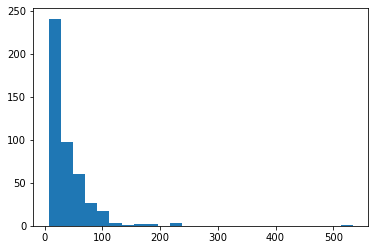

In [20]:
import matplotlib.pyplot as plt

h = plt.hist([len(G) for G in graphs], bins = 25)

In [21]:
sqs = [rds.rds_pallete.graphToSequence(G) for G in graphs]

In [36]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
for e,seq in enumerate(sqs):
    if not is_isomorphic(rds.G_initial_rds, 
                seq[-1][0], 
                gu.node_match_type, 
                gu.edge_match_type):
        print(e)


208
254
291
349
435


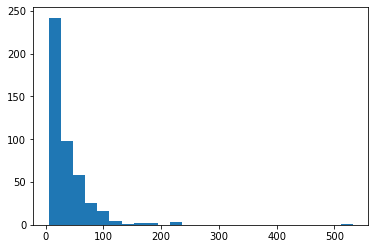

In [37]:
h = plt.hist([len(s) for s in sqs], bins = 25)